# Exploratory Analysis on Music Lyrics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pymongo
import string
import re
from nltk.tag.perceptron import PerceptronTagger
TAGGER = PerceptronTagger()

In [184]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I would",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"gotta": "got to",
"wanna": "want to"
}

In [2]:
client = pymongo.MongoClient()
songs = client.lyrics.all_songs

In [5]:
songs.count()

144891

In [217]:
songs.find().next()

{u'_id': ObjectId('56d49cf4b165272a2dca561c'),
 u'a_album': u'How Ace Are Buildings?',
 u'a_album_year': 1997,
 u'a_lyrics': u"Turn it up, I don't know where you're plugging in\nListen up, yeah we're all set to begin\nTurn it up, 'cause we hope you like it lots\nWould you really love, any second glance?\n\nMake and like, cheeky monkey grins\nAnd for tonight, I'd love you let you in",
 u'a_name': u'A',
 u'a_song': u'Turn It Up',
 u'a_tag': u'A',
 u'id': 1}

In [3]:
test_song = songs.find({'a_name': 'BILLY JOEL'}).next()
test_song

{u'_id': ObjectId('56d49cf5b165272a2dca987b'),
 u'a_album': u'Cold Spring Harbor',
 u'a_album_year': 1971,
 u'a_lyrics': u"She's got a way about her\nI don't know what it is\nBut I know that I can't live without her\nShe s got a way of pleasin'\nI don't know what it is\nBut there doesn't have to be a reason anyway\nShe's got a smile that heals me\nI don't know why it is\nBut I have to laugh when she reveals me\nShe's got a way of talkin'\nI don't know why it is\nBut it lifts me up when we are walkin' anywhere\n\nShe comes to me when I'm feelin' down\nInspires me without a sound She touches me\nand I get turned around\nShe's got a way of showin'\nHow I make her feel\nAnd I find the strength to keep on goin'\nShe's got a light around her\nAnd ev'rywhere she goes\nA million dreams of love surround her\nev'rywhere\n\nShe comes to me when I'm feelin' down\nInspires me without a sound\nShe touches me and I get turned around\n\nShe's got a smile that heals me\nI don't know why it is\nBut I ha

# Tokenize and Stem

In [7]:
# let's do some natural language processing on this bad boy!

# first make a clean entry into the dataset

In [294]:
import nltk

stop = set(nltk.corpus.stopwords.words('english'))
# songs are about me, we, you - might be interesting to use them
mwy_words = set([u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', 
                 u'ourselves', u'you', u'your', u'yours', u'yourself',
                 u'yourselves', u'he', u'him', u'his', u'himself', u'she',
                 u'her', u'hers', u'herself'])
add_words = set(['got', 'on', 'go', 'get', 'come', ])
# creating new set of stop words with me, we, you
stop_mwy = stop - mwy_words

In [228]:
def tokenize_all(song, stop_list):

    song = song.lower()
    
    # replaces contractions
    for key, value in contractions.iteritems():
        song = re.sub(key.lower(), value.lower(), song)
    
    # remove punctuation and make lowercase
    punc = string.punctuation
    regex = re.compile('[%s]' % re.escape(punc))
    song = re.sub(regex, '', song)

    # replaces in' with ing
    song = re.sub(r"(\w+)in'(\s)", r"\1ing\2", song)
    
    tokenized = [word for word in song.split() if word not in stop_list and 
    
    return tokenized

In [49]:
# stemmers
sno_stemmer = nltk.stem.SnowballStemmer('english')
port_stemmer = nltk.stem.PorterStemmer()
lan_stemmer = nltk.stem.LancasterStemmer()

In [11]:
# lemmetizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

morphy_tag = {'NN':wordnet.NOUN,'JJ':wordnet.ADJ,'VB':wordnet.VERB,'RB':wordnet.ADV}

lmtzr = WordNetLemmatizer()

In [113]:
def stem_song(tokenized_song, stemmer_obj):
    # stemming tokenized song
    stems = [stemmer_obj.stem(token) for token in tokenized_song]
    return stems

In [29]:
def pos_tag_song(tokens):
    # parts of speech tagger
    tagset = None
    tags = nltk.tag._pos_tag(tokens, tagset, TAGGER)
    return tags

In [43]:
def lem_song(pos_tagged, lemmatizer_obj):
    # lemmatizing tokenized song
    lemms = []
    for word in pos_tagged:
        if word[1][:2] in morphy_tag:
            lemm = lemmatizer_obj.lemmatize(word[0], morphy_tag[word[1][:2]])
        else:
            lemm = lemmatizer_obj.lemmatize(word[0])
        lemms.append(lemm)
    return lemms

In [230]:
test_tokens = tokenize_all(test_song['a_lyrics'], stop_mwy)
test_pos = pos_tag_song(test_tokens)
test_lemm = lem_song(test_pos, lmtzr)

In [231]:
test_pos

[(u'we', 'PRP'),
 (u'talking', 'VBG'),
 (u'away', 'RB'),
 (u'i', 'NN'),
 (u'know', 'VBP'),
 (u'i', 'NNS'),
 (u'say', 'VBP'),
 (u'i', 'NNS'),
 (u'say', 'VBP'),
 (u'anyway', 'RB'),
 (u'todays', 'JJ'),
 (u'another', 'DT'),
 (u'day', 'NN'),
 (u'find', 'VB'),
 (u'you', 'PRP'),
 (u'shying', 'VBG'),
 (u'away', 'RB'),
 (u'i', 'JJ'),
 (u'coming', 'VBG'),
 (u'your', 'PRP$'),
 (u'love', 'NN'),
 (u'ok', 'NN'),
 (u'take', 'VB'),
 (u'me', 'PRP'),
 (u'take', 'VB'),
 (u'me', 'PRP'),
 (u'i', 'JJ'),
 (u'gone', 'VBN'),
 (u'day', 'NN'),
 (u'two', 'CD'),
 (u'needless', 'JJ'),
 (u'say', 'VBP'),
 (u'i', 'JJ'),
 (u'odds', 'VBP'),
 (u'ends', 'NNS'),
 (u'me', 'PRP'),
 (u'stumbling', 'VBG'),
 (u'away', 'RB'),
 (u'slowly', 'RB'),
 (u'learning', 'JJ'),
 (u'life', 'NN'),
 (u'ok', 'NNS'),
 (u'say', 'VBP'),
 (u'me', 'PRP'),
 (u'better', 'JJR'),
 (u'safe', 'JJ'),
 (u'sorry', 'NN'),
 (u'take', 'VB'),
 (u'me', 'PRP'),
 (u'take', 'VB'),
 (u'me', 'PRP'),
 (u'i', 'JJ'),
 (u'gone', 'VBN'),
 (u'day', 'NN'),
 (u'two', 'CD'),


# Count Vectorize

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

text = [' '.join(test_lemm)]
vectorizer = CountVectorizer()
vectorizer.fit(text)

print vectorizer.get_feature_names()

[u'anyway', u'anywhere', u'around', u'cannot', u'come', u'dream', u'ev', u'feel', u'find', u'get', u'go', u'heals', u'her', u'inspires', u'keep', u'know', u'laugh', u'lift', u'light', u'live', u'love', u'make', u'me', u'million', u'please', u'reason', u'reveal', u'rywhere', u'she', u'show', u'smile', u'sound', u'strength', u'surround', u'talk', u'touch', u'turn', u'walk', u'way', u'we', u'without']


In [62]:
# Convert text to a bag of words
X = vectorizer.transform(text)
X.toarray()

array([[ 2,  1,  3,  2,  2,  1,  2,  3,  1, 10,  2,  2,  7,  2,  1,  8,  2,
         1,  1,  2,  1,  1, 11,  1,  1,  1,  2,  2, 15,  1,  2,  2,  1,  1,
         1,  2,  2,  1,  5,  1,  4]])

In [63]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

,anyway,anywhere,around,cannot,come,dream,ev,feel,find,get,...,sound,strength,surround,talk,touch,turn,walk,way,we,without
0,2,1,3,2,2,1,2,3,1,10,...,2,1,1,1,2,2,1,5,1,4


# Testing Count Vectorizer on Year 1969

In [153]:
from sklearn.feature_extraction.text import CountVectorizer

In [219]:
test_songs = []

for song in songs.find({'a_album_year': 2000}, {'a_lyrics': 1, 'a_song': 1, 'a_name': 1, 'a_album_year': 1, 
                                                'a_album': 1, "_id": 0}):
    test_songs.append(song)

In [224]:
test_songs[0]['a_lyrics']

u"We're talking away\nI don't know what\nI'm to say I'll say it anyway\nToday's another day to find you\nShying away\nI'll be coming for your love, OK?\n\nTake on me, take me on\nI'll be gone\nIn a day or two\n\nSo needless to say\nI'm odds and ends\nBut that's me stumbling away\nSlowly learning that life is OK.\nSay after me\nIt's no better to be safe than sorry\n\nTake on me, take me on\nI'll be gone\nIn a day or two\n\nOh the things that you say\nIs it life or\nJust a play my worries away\nYou're all the things I've got to \nremember\nYou're shying away\nI'll be coming for you anyway\n\nTake on me, take me on\nI'll be gone\nIn a day or two"

In [237]:
test_lemms = []
test_stems = []
test_tokens = []
album_years = []
albums = []
song_names = []
artist_names = []

for test_song in test_songs:
    artist_names.append(test_song['a_name'])
    album_years.append(test_song['a_album_year'])
    test_token = tokenize_all(test_song['a_lyrics'], stop_mwy)
    test_tokens.append(test_token)
    test_pos = pos_tag_song(test_token)
    #test_lemm = lem_song(test_pos, lmtzr)
    #test_lemms.append(test_lemm)
    test_stem = stem_song(test_token, lan_stemmer)
    test_stems.append(test_stem)

In [240]:
test_tokens[0], test_stems[0]

([u'we',
  u'talking',
  u'away',
  u'i',
  u'know',
  u'i',
  u'say',
  u'i',
  u'say',
  u'anyway',
  u'todays',
  u'another',
  u'day',
  u'find',
  u'you',
  u'shying',
  u'away',
  u'i',
  u'coming',
  u'your',
  u'love',
  u'ok',
  u'take',
  u'me',
  u'take',
  u'me',
  u'i',
  u'gone',
  u'day',
  u'two',
  u'needless',
  u'say',
  u'i',
  u'odds',
  u'ends',
  u'me',
  u'stumbling',
  u'away',
  u'slowly',
  u'learning',
  u'life',
  u'ok',
  u'say',
  u'me',
  u'better',
  u'safe',
  u'sorry',
  u'take',
  u'me',
  u'take',
  u'me',
  u'i',
  u'gone',
  u'day',
  u'two',
  u'oh',
  u'things',
  u'you',
  u'say',
  u'life',
  u'play',
  u'my',
  u'worries',
  u'away',
  u'you',
  u'things',
  u'i',
  u'got',
  u'remember',
  u'you',
  u'shying',
  u'away',
  u'i',
  u'coming',
  u'you',
  u'anyway',
  u'take',
  u'me',
  u'take',
  u'me',
  u'i',
  u'gone',
  u'day',
  u'two'],
 [u'we',
  u'talk',
  u'away',
  u'i',
  u'know',
  u'i',
  u'say',
  u'i',
  u'say',
  u'anyway',
 

In [245]:
import itertools
vocab_frame = pd.DataFrame({'words': list(itertools.chain(*test_tokens))}, index = list(itertools.chain(*test_stems)))

In [157]:
test_lemms[0]

[u'we',
 u'talk',
 u'away',
 u'i',
 u'know',
 u'i',
 u'say',
 u'i',
 u'say',
 u'anyway',
 u'todays',
 u'another',
 u'day',
 u'find',
 u'you',
 u'shy',
 u'away',
 u'i',
 u'come',
 u'your',
 u'love',
 u'ok',
 u'take',
 u'me',
 u'take',
 u'me',
 u'i',
 u'go',
 u'day',
 u'two',
 u'needless',
 u'say',
 u'i',
 u'odds',
 u'end',
 u'me',
 u'stumble',
 u'away',
 u'slowly',
 u'learning',
 u'life',
 u'ok',
 u'say',
 u'me',
 u'good',
 u'safe',
 u'sorry',
 u'take',
 u'me',
 u'take',
 u'me',
 u'i',
 u'go',
 u'day',
 u'two',
 u'oh',
 u'thing',
 u'you',
 u'say',
 u'life',
 u'play',
 u'my',
 u'worry',
 u'away',
 u'you',
 u'thing',
 u'i',
 u'get',
 u'remember',
 u'you',
 u'shy',
 u'away',
 u'i',
 u'come',
 u'you',
 u'anyway',
 u'take',
 u'me',
 u'take',
 u'me',
 u'i',
 u'go',
 u'day',
 u'two']

In [158]:
test_stems[0]

[u'we',
 u'talk',
 u'away',
 u'i',
 u'know',
 u'i',
 u'say',
 u'i',
 u'say',
 u'anyway',
 u'today',
 u'anoth',
 u'day',
 u'find',
 u'you',
 u'shy',
 u'away',
 u'i',
 u'com',
 u'yo',
 u'lov',
 u'ok',
 u'tak',
 u'me',
 u'tak',
 u'me',
 u'i',
 u'gon',
 u'day',
 u'two',
 u'needless',
 u'say',
 u'i',
 u'od',
 u'end',
 u'me',
 u'stumbl',
 u'away',
 u'slow',
 u'learn',
 u'lif',
 u'ok',
 u'say',
 u'me',
 u'bet',
 u'saf',
 u'sorry',
 u'tak',
 u'me',
 u'tak',
 u'me',
 u'i',
 u'gon',
 u'day',
 u'two',
 u'oh',
 u'thing',
 u'you',
 u'say',
 u'lif',
 u'play',
 u'my',
 u'worry',
 u'away',
 u'you',
 u'thing',
 u'i',
 u'got',
 u'rememb',
 u'you',
 u'shy',
 u'away',
 u'i',
 u'com',
 u'you',
 u'anyway',
 u'tak',
 u'me',
 u'tak',
 u'me',
 u'i',
 u'gon',
 u'day',
 u'two']

In [199]:
text = [' '.join(stem) for stem in test_stems]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text)
X_array = X.toarray()
terms = vectorizer.get_feature_names()
term_matrix = pd.DataFrame(X_array, columns=terms)

In [160]:
# function to pring full pandas df

def print_full(df):
    pd.set_option('display.max_rows', len(df))
    print(df)
    pd.reset_option('display.max_rows')

In [161]:
len(term_matrix.columns)

26407

# Tf-idf

In [179]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans

transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X_array)
tfidf

<5141x26407 sparse matrix of type '<type 'numpy.float64'>'
	with 459897 stored elements in Compressed Sparse Row format>

In [177]:
tfidf.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [209]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters, max_iter=1000, n_jobs=-1)
km.fit(tfidf)

KMeans(copy_x=True, init='k-means++', max_iter=1000, n_clusters=7, n_init=10,
    n_jobs=-1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [210]:
clusters = km.labels_

In [211]:
pd.Series(clusters).value_counts()

4    1881
0    1358
6     685
2     662
3     247
5     167
1     141
dtype: int64

In [246]:
from __future__ import print_function

terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :30]:
        print(' %s' % vocab_frame.ix[terms[ind]], end='')
    print()

Cluster 0:     words
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
..    ...
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you
you   you

[58323 rows x 1 columns]    words
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
..   ...
yo  your
yo  your
yo  your
yo  your
yo  your
yo  your
y

KeyError: u'wann'

# Making Count Vectorized By Year - Porter Stemming

In [293]:
# create count vectorized pandas dataframes for each year

term_year_dict = {}

for year in range(1950, 2011):
    # initialize
    songlist = []
    tokenslist = []
    stemslist = []
    # get list of songs in the year
    for song in songs.find({'a_album_year': year}, {'a_lyrics': 1, "_id": 0}):
        songlist.append(song)
    print(len(songlist))
    if len(songlist) == 0:
        continue
    for song in songlist:
        # get tokens
        tokens = tokenize_all(song['a_lyrics'], stop_mwy)
        tokenslist.append(tokens)
        # get stems
        stems = stem_song(tokens, port_stemmer)
        stemslist.append(stems)
    # recreate texts from the tokens
    text = [' '.join(stem) for stem in stemslist]
    # Count Vectorize
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(text)
    X_array = X.toarray()
    terms = vectorizer.get_feature_names()
    term_matrix = pd.DataFrame(X_array, columns=terms)
    term_year_dict[year] = term_matrix
    
    

16
0
0
0
16
15
39
98
79
76
47
80
123
156
312
370
417
671
576
853
910
923
852
931
962
911
1016
1069
1044
1036
1198
990
1095
1171
967
1004
1324
1201
1336
1465
1427
1813
1838
2373
2663
3259
3399
3573
4089
4671
5141
5761
6741
7498
8346
8392
8806
8387
8232
8648
8221


In [303]:
corpus_len = []
years = []
for year, frame in term_year_dict.iteritems():
    corpus_len.append(len(frame.columns))
    years.append(year)
    

(array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.,  40000.]), <a list of 9 Text yticklabel objects>)

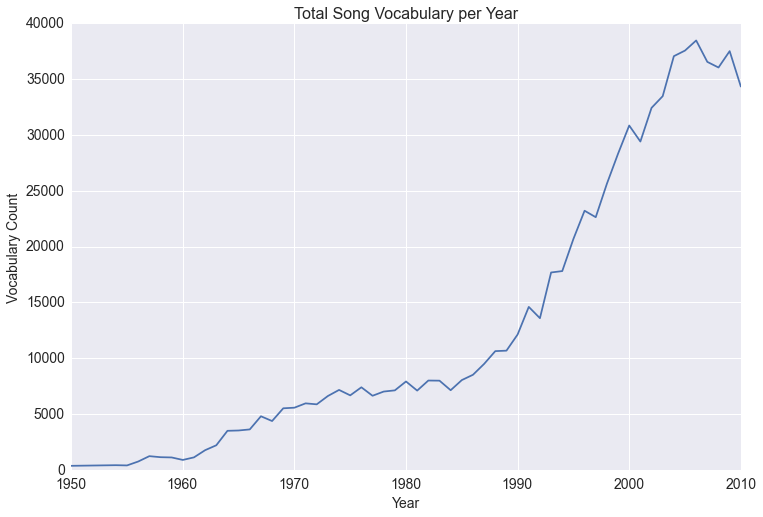

In [315]:
plt.figure(figsize=(12, 8))
plt.plot(years, corpus_len)
plt.title('Total Song Vocabulary per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Vocabulary Count', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [326]:
# testing histogram for word frequency
word = 'love'
word_stem = port_stemmer.stem(word)

years = []
normalized_counts = []

for year, frame in term_year_dict.iteritems():
    years.append(year)
    word_sum = frame[word_stem].sum()
    total_words = frame.sum().sum()
    normalized_counts.append(word_sum/float(total_words))

(array([ 0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,
         0.045]), <a list of 9 Text yticklabel objects>)

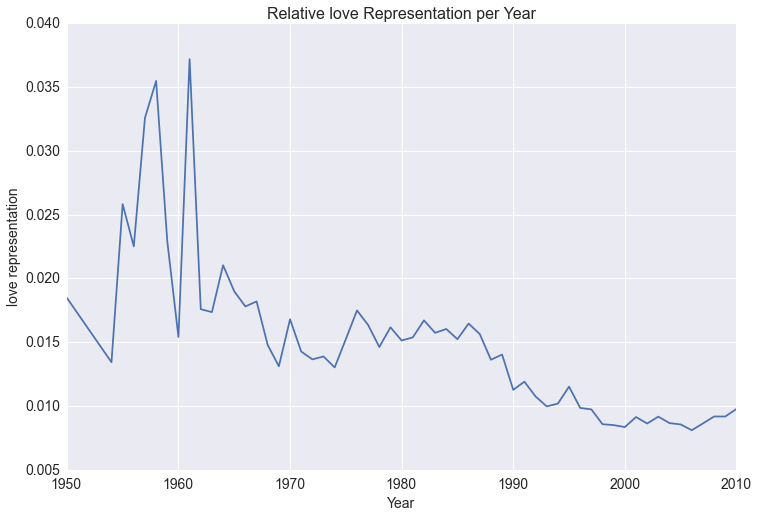

In [330]:
plt.figure(figsize=(12, 8))
plt.plot(years, normalized_counts)
plt.title('Relative ' + word + ' Representation per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel(word + ' representation', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [334]:
def plot_freq(word):

    word_stem = port_stemmer.stem(word)

    years = []
    normalized_counts = []

    for year, frame in term_year_dict.iteritems():
        years.append(year)
        try:
            word_sum = frame[word_stem].sum()
        except:
            normalized_counts.append(0)
            continue
        total_words = frame.sum().sum()
        normalized_counts.append(word_sum/float(total_words))
    
    plt.figure(figsize=(12, 8))
    plt.plot(years, normalized_counts)
    plt.title('Relative ' + word + ' Representation per Year', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(word + ' representation', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

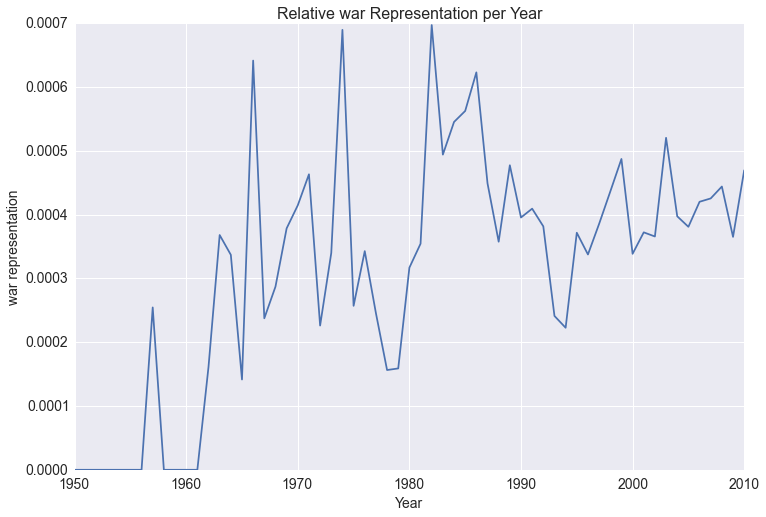

In [335]:
plot_freq('war')

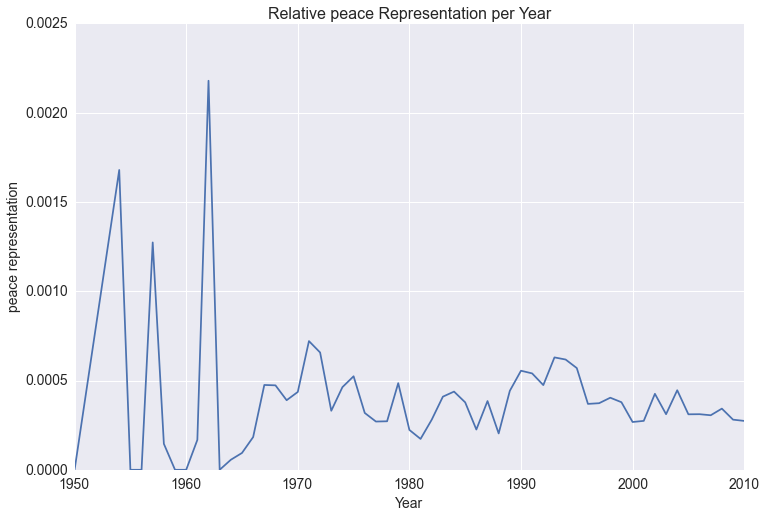

In [336]:
plot_freq('peace')